In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

!conda install -c conda-forge lxml=4.6.2 --yes

!conda install -c conda-forge geocoder --yes
import geocoder

print('Libraries imported.')


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    pandas-1.1.5               |   py36h284efc9_0        11.3 MB  conda-forge
    toolz-0.11.1               |             py_0          46 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        12.1 MB

The following NEW p

Getting tha data of London Districts

In [2]:
data = pd.read_html("https://en.wikipedia.org/wiki/London_boroughs")
df_london=data[2]

In [3]:
london_dists = df_london[['London borough', 'Designation']]
london_dists.head()

,London borough,Designation
0,Camden,Inner
1,Greenwich,Inner
2,Hackney,Inner
3,Hammersmith[notes 2],Inner
4,Islington,Inner


Cleaning the Data

In [4]:
clean_dists = london_dists["London borough"].apply(lambda x: x[0:x.find("[")] if x.find("[") != -1 else x)
london_dists.drop("London borough", 1)
london_dists["London borough"] = clean_dists
london_dists.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,London borough,Designation
0,Camden,Inner
1,Greenwich,Inner
2,Hackney,Inner
3,Hammersmith,Inner
4,Islington,Inner


In [5]:
london_dists.shape

(32, 2)

Now let us get the latitude and longitude of London

In [6]:
london_lan_lon=geocoder.arcgis('London, UK')
London_lat = london_lan_lon.latlng[0]
London_lng = london_lan_lon.latlng[1]

Now we get the latitude and longitude of the districts of London and put them in two arrays

In [7]:
latitude_arr = []
longitude_arr = []
for neighbor in london_dists["London borough"]:
    lat_lon_coords = None
    while (lat_lon_coords is None):
        g=geocoder.arcgis('{}, London, UK'.format(neighbor))
#         print("here is location ", g.latlng)
        lat_lon_coords = g.latlng
#     print("postal_code")
    latitude_arr.append(lat_lon_coords[0])
    longitude_arr.append(lat_lon_coords[1])
print("done")


done


In [42]:
# saved_latitude_arr = latitude_arr
# saved_longitude_arr = longitude_arr
# latitude_arr

In [8]:
london_dists["Latitude"] = pd.Series(latitude_arr)
london_dists["Longitude"] = pd.Series(longitude_arr)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
london_dists.head(2)

,London borough,Designation,Latitude,Longitude
0,Camden,Inner,51.53236,-0.12796
1,Greenwich,Inner,51.48454,0.00275


Now lets take a look at the 32 districts of London in a map

In [10]:
map_london = folium.Map(location=[London_lat, London_lng], zoom_start=11)

# add markers to map
for lat, lng, label in zip(london_dists['Latitude'], london_dists['Longitude'], london_dists['London borough']):
    label = folium.Popup(label, parse_html=False)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

#### Now let's get the top venus of the neighborhoods of London

First let's define Foursquare Credentials and Version

In [11]:
CLIENT_ID = 'MLLMHYKAGPATS41JYT04LNU4KNMTB1SUZX5SPYVNGT2E2PN5' # your Foursquare ID
CLIENT_SECRET = '5SD4AM4YO3MKL0LQ2EPJU4JA30VLOOBXU1RQ1YV43MGU5DYD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: MLLMHYKAGPATS41JYT04LNU4KNMTB1SUZX5SPYVNGT2E2PN5
CLIENT_SECRET:5SD4AM4YO3MKL0LQ2EPJU4JA30VLOOBXU1RQ1YV43MGU5DYD


Now we define a function (get_category_type) to get the categories types from the foursquare data

In [12]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

let us also define the radius and the limit for the foursquare api

In [13]:
radius = 500
limit = 100

Now we create a function to get the top venus of the neighborhoods of London

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['borough', 
                  'borough Latitude', 
                  'borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print("done")
    return(nearby_venues)

Finally let's get the data

In [15]:
london_venues = getNearbyVenues(london_dists['London borough'], london_dists['Latitude'], london_dists['Longitude'])

Camden
Greenwich
Hackney
Hammersmith
Islington
Kensington and Chelsea
Lambeth
Lewisham
Southwark
Tower Hamlets
Wandsworth
Westminster
Barking
Barnet
Bexley
Brent
Bromley
Croydon
Ealing
Enfield
Haringey
Harrow
Havering
Hillingdon
Hounslow
Kingston upon Thames
Merton
Newham
Redbridge
Richmond upon Thames
Sutton
Waltham Forest
done


Now let's see tha how many rows did you get from foursquare api

In [16]:
london_venues.shape

(1149, 7)

In [17]:
london_venues.head()

,borough,borough Latitude,borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Camden,51.53236,-0.12796,M&S Simply Food,51.532800,-0.127123,Grocery Store
1,Camden,51.53236,-0.12796,Granger & Co.,51.532606,-0.125275,Breakfast Spot
2,Camden,51.53236,-0.12796,London St Pancras International Railway Statio...,51.531982,-0.126086,Train Station
3,Camden,51.53236,-0.12796,German Gymnasium,51.532392,-0.125267,Modern European Restaurant
4,Camden,51.53236,-0.12796,Godiva,51.531304,-0.125811,Chocolate Shop


Let's check how many venues were returned for each neighborhood

In [18]:
london_venues.groupby('borough').count()

,borough Latitude,borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
borough,,,,,,
Barking,3,3,3,3,3,3
Barnet,61,61,61,61,61,61
Bexley,6,6,6,6,6,6
Brent,5,5,5,5,5,5
Bromley,10,10,10,10,10,10
Camden,67,67,67,67,67,67
Croydon,4,4,4,4,4,4
Ealing,88,88,88,88,88,88
Enfield,32,32,32,32,32,32


Let's see how many unique venue category do we have in our data

In [19]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 216 uniques categories.


Analyze Each Neighborhood

In [20]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")
london_onehot.insert(0, "Borough", london_venues['borough'])
london_onehot.head()

,Borough,Afghan Restaurant,African Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Store,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Campground,Canal,Canal Lock,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Empanada Restaurant,English Restaurant,Escape Room,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,Gift Shop,Golf Course,Golf Driving Range,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health Food Store,Herbs & Spices Store,Himalayan Restaurant,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Lebanese Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Mattress Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,New American Restaurant,Nightclub,Noodle House,Organic Grocery,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Portuguese Restaurant,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Road,Rock Club,Rugby Pitch,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sri Lankan Restaurant,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Train Station,Tree,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Camden,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Camden,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Camden,0,0,0,

In [21]:
london_onehot.shape

(1149, 217)

Now let's group rows by borough and by taking the mean of the frequency of occurrence of each category


In [47]:
london_grouped = london_onehot.groupby('Borough').mean().reset_index()
london_grouped.head(2)

,Borough,Afghan Restaurant,African Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Store,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Campground,Canal,Canal Lock,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Empanada Restaurant,English Restaurant,Escape Room,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,Gift Shop,Golf Course,Golf Driving Range,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health Food Store,Herbs & Spices Store,Himalayan Restaurant,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Lebanese Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Mattress Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,New American Restaurant,Nightclub,Noodle House,Organic Grocery,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Portuguese Restaurant,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Road,Rock Club,Rugby Pitch,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sri Lankan Restaurant,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Train Station,Tree,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Barking,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0

##### Let's put top venues into a _pandas_ dataframe


First, let's write a function to sort the venues in descending order.

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [49]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Boroughs_venues_sorted = pd.DataFrame(columns=columns)
Boroughs_venues_sorted['Borough'] = london_grouped['Borough']

for ind in np.arange(london_grouped.shape[0]):
    Boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

Boroughs_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Barking,Pub,Gym Pool,Sandwich Place,Empanada Restaurant,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Escape Room,English Restaurant
1,Barnet,Coffee Shop,Pub,Café,Furniture / Home Store,Thrift / Vintage Store,Park,Bakery,Restaurant,Bagel Shop,Boxing Gym,Fried Chicken Joint,Dessert Shop,Market,Flower Shop,Shoe Store
2,Bexley,Park,Indian Restaurant,Bus Stop,Botanical Garden,Campground,Yoga Studio,Falafel Restaurant,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant,Farmers Market
3,Brent,Playground,Metro Station,Chinese Restaurant,Tennis Court,Golf Course,Yoga Studio,Escape Room,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant
4,Bromley,Soccer Stadium,Pub,Greek Restaurant,Hostel,Mediterranean Restaurant,Supermarket,Bar,Train Station,Sporting Goods Shop,Gym / Fitness Center,Flea Market,Historic Site,Fish & Chips Shop,Film Studio,Fast Food Restaurant


Now let's find the best number for k because we are going to use K means clustering algorithm

In [50]:
max_range = 15

london_grouped_clustering = london_grouped.drop('Borough', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = london_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

Let's define a function to plot the scores of silhouette_samples

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

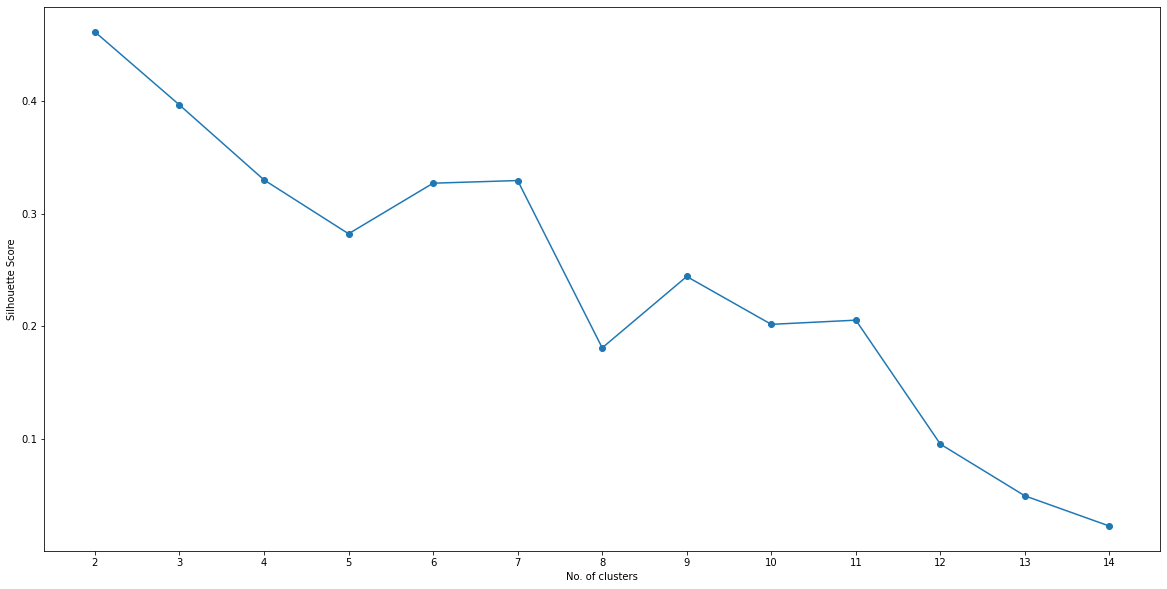

In [52]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

We can see that 7 is the best number for k

## Cluster Neighborhoods


In [53]:
# set number of clusters
kclusters = 7

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 3, 5, 0, 0, 6, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [54]:
# add clustering labels
Boroughs_venues_sorted.insert(1, 'Cluster Labels', kmeans.labels_)

london_merged = london_dists

# # merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(Boroughs_venues_sorted.set_index('Borough'), on='London borough')

london_merged.head() # check the last columns!

,London borough,Designation,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Camden,Inner,51.53236,-0.12796,0,Café,Hotel,Coffee Shop,Breakfast Spot,Bar,Park,Restaurant,Gastropub,Train Station,Pub,Mexican Restaurant,Canal Lock,Gym / Fitness Center,Canal,Chocolate Shop
1,Greenwich,Inner,51.48454,0.00275,0,Pub,Grocery Store,Coffee Shop,Pier,Turkish Restaurant,Indian Restaurant,Lake,South Indian Restaurant,Bus Station,Bus Stop,Sculpture Garden,Café,Japanese Restaurant,English Restaurant,Recreation Center
2,Hackney,Inner,51.54505,-0.05532,0,Pub,Coffee Shop,Brewery,Bakery,Cocktail Bar,Organic Grocery,Bus Stop,Café,Park,Clothing Store,Modern European Restaurant,Vegetarian / Vegan Restaurant,Grocery Store,Vietnamese Restaurant,Hotel
3,Hammersmith,Inner,51.49617,-0.22935,0,Pub,Sandwich Place,Coffee Shop,Hotel,Gym / Fitness Center,Portuguese Restaurant,Clothing Store,Tapas Restaurant,Chinese Restaurant,Cocktail Bar,Café,Gastropub,Grocery Store,Pharmacy,Burrito Place
4,Islington,Inner,51.53279,-0.10614,0,Pub,Coffee Shop,Café,French Restaurant,Hotel,Vietnamese Restaurant,Arts & Crafts Store,Vegetarian / Vegan Restaurant,Park,Food Truck,Gym / Fitness Center,Restaurant,Mediterranean Restaurant,Ramen Restaurant,Korean Restaurant


In [56]:
# london_grouped

Finally, let's visualize the resulting clusters

In [55]:
# create map
map_clusters = folium.Map(location=[London_lat, London_lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['London borough'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examining Clusters

Cluster 1

In [56]:
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]
    

,London borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Camden,Café,Hotel,Coffee Shop,Breakfast Spot,Bar,Park,Restaurant,Gastropub,Train Station,Pub,Mexican Restaurant,Canal Lock,Gym / Fitness Center,Canal,Chocolate Shop
1,Greenwich,Pub,Grocery Store,Coffee Shop,Pier,Turkish Restaurant,Indian Restaurant,Lake,South Indian Restaurant,Bus Station,Bus Stop,Sculpture Garden,Café,Japanese Restaurant,English Restaurant,Recreation Center
2,Hackney,Pub,Coffee Shop,Brewery,Bakery,Cocktail Bar,Organic Grocery,Bus Stop,Café,Park,Clothing Store,Modern European Restaurant,Vegetarian / Vegan Restaurant,Grocery Store,Vietnamese Restaurant,Hotel
3,Hammersmith,Pub,Sandwich Place,Coffee Shop,Hotel,Gym / Fitness Center,Portuguese Restaurant,Clothing Store,Tapas Restaurant,Chinese Restaurant,Cocktail Bar,Café,Gastropub,Grocery Store,Pharmacy,Burrito Place
4,Islington,Pub,Coffee Shop,Café,French Restaurant,Hotel,Vietnamese Restaurant,Arts & Crafts Store,Vegetarian / Vegan Restaurant,Park,Food Truck,Gym / Fitness Center,Restaurant,Mediterranean Restaurant,Ramen Restaurant,Korean Restaurant
5,Kensington and Chelsea,Café,Pizza Place,Gym,Pub,Street Food Gathering,Deli / Bodega,Middle Eastern Restaurant,Burger Joint,Skate Park,Fish & Chips Shop,Beer Bar,English Restaurant,Donut Shop,Cocktail Bar,Record Shop
6,Lambeth,Pub,Coffee Shop,Fish & Chips Shop,Pizza Place,Café,Indian Restaurant,Italian Restaurant,Gastropub,Park,Motorcycle Shop,Film Studio,Plaza,Garden,Gay Bar,Climbing Gym
7,Lewisham,Clothing Store,Coffee Shop,Pub,Fast Food Restaurant,Restaurant,Pharmacy,Grocery Store,Café,Market,Mobile Phone Shop,Fish & Chips Shop,Bus Stop,Portuguese Restaurant,Sandwich Place,Street Food Gathering
8,Southwark,Coffee Shop,Pub,Seafood Restaurant,Italian Restaurant,Asian Restaurant,Portuguese Restaurant,Café,Restaurant,Hotel,Wine Bar,Steakhouse,Street Food Gathering,French Restaurant,English Restaurant,Fast Food Restaurant
9,Tower Hamlets,Pub,Chinese Restaurant,Bakery,Supermarket,Coffee Shop,Food Truck,Thai Restaurant,Recreation Center,Thrift / Vintage Store,Brewery,Sandwich Place,Fast Food Restaurant,Gym / Fitness Center,Portuguese Restaurant,Asian Restaurant


Cluster 2

In [57]:
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Designation,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
29,Outer,Lake,Nature Preserve,Business Service,Yoga Studio,Event Space,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Escape Room


Cluster 3

In [58]:
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Designation,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
12,Outer,Pub,Gym Pool,Sandwich Place,Empanada Restaurant,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Escape Room,English Restaurant


cluster 4

In [59]:
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Designation,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
14,Outer,Park,Indian Restaurant,Bus Stop,Botanical Garden,Campground,Yoga Studio,Falafel Restaurant,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant,Farmers Market


Cluster 5

In [61]:
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Designation,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
27,Outer,Coffee Shop,Supermarket,Bus Stop,Soccer Field,Yoga Studio,Event Space,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Escape Room


Cluster 6

In [62]:
london_merged.loc[london_merged['Cluster Labels'] == 5, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Designation,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
15,Outer,Playground,Metro Station,Chinese Restaurant,Tennis Court,Golf Course,Yoga Studio,Escape Room,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant


Cluster 7

In [63]:
london_merged.loc[london_merged['Cluster Labels'] == 6, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Designation,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
17,Outer,Supermarket,Fast Food Restaurant,Café,Park,Yoga Studio,Event Space,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Film Studio,Farmers Market,Falafel Restaurant,Escape Room
